<a href="https://colab.research.google.com/github/ZiyueNie/19ma573ZiyueNie/blob/master/src/hw10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heat equation:    $$u_t=\alpha u_{xx}$$
Boundary condition: $$u(a,t)=g(t);u(b,t)=h(t)$$
Initial condition: $$u(x,0)=f(x)$$
 Grid 
$$x_i=a+i\Delta x;\Delta x=\frac{b-a}{N},i=0,1,...,N $$
$$t_j=j\Delta t;\Delta t=\frac{T}{M},j=0,1,...,M $$

$$u_i^j=\rho u_{i-1}^{j-1} +(1-2\rho)u_i^{j-1}+\rho u_{i+1}^{j-1} $$
$$u_i^0=\phi(a+i\Delta x)$$
$$ \rho=\frac{\Delta t}{(\Delta x)^2} $$ 
now we define 
$$u_0^j=(1-2\rho)u_0^{j-1}+\rho u_1^{j-1}$$
$$u_{N-1}^j=\rho u_{N-2}^{j-1} +(1-2\rho)u_{N-1}^{j-1}$$
<br>paras
<br>$\alpha=1, a=0,b=1$
<br>$f(x)=sin(\pi x)$
<br>$g(t)=h(t)=0$
<br>exact solution $u(x,t)=e^{-\pi^2t}sin(\pi x)$



**Implementation1**
$$\rho=0.4, dx=0.2$$

**Find $L^\infty $error between exact solution and ftcs solution**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [0]:
alpha=1

dx=0.2
dt=rho*(dx**2)/alpha
a=0
b=1

In [0]:
def f(x):
  return np.sin(np.pi*x)

In [0]:
def FTCS(N,M,rho):
  U=np.zeros((N,M))
  #rho=alpha*dt/(dx**2)
  dt=rho*(dx**2)/alpha
  for i in range(N):
    U[i,0]=f(i*dx+a)
  #for j in range(M):
    #U[0,j]=(1-2*rho)*U[0,j-1]+rho*U[1,j-1]
    #U[N-1,j]=rho*U[N-2,j-1]+(1-2*rho)*U[N-1,j-1]
  for j in range(1,M):
    for i in range(1,N-1):
      U[i,j]=rho*U[i-1,j-1]+(1-2*rho)*U[i,j-1]+rho*U[i+1,j-1]
      U[0,j]=(1-2*rho)*U[0,j-1]+rho*U[1,j-1]
      U[N-1,j]=rho*U[N-2,j-1]+(1-2*rho)*U[N-1,j-1]
  
  return U

In [0]:

def exact_solution(i,j):
  return np.exp((-np.pi**2)*j*dt)*np.sin(np.pi*(a+i*dx))

In [0]:
def error(N,M,rho):
  e_s=np.zeros((N,M))
  for i in range(N):
    for j in range(M):
      e_s[i,j]=exact_solution(i,j)
  error=np.abs(FTCS(N,M,rho)-e_s)
  
  for e in error:
    return max(e)

In [135]:
a=error(100,100,0.4) #M=100 N=100 rho=0.4
print("error between exact solution and ftcs solution is"+str(a))

error between exact solution and ftcs solution is0.2556192470106998


In [136]:
M_=[]
T=[1.95, 1.97, 1.98]
for t in T:
  M_.append(int(t/dt))
print(M_)

[121, 123, 123]


In [0]:
def heat_ftcs_curve(alpha,dx,rho,a,f,exact_solution,b,n,num):
  dt = rho*(dx**2)/alpha
  linespace = np.linspace(a-n,b+n,(b+n)-(a-n)+1)
  temp=[]
  for i in range(n):
    if i==0:
      temp=linespace
      u_j_list = [f(temp[j]*dx) for j in range((b+n)-(a-n)+1)]
      exact_solution_list = exact_solution(linespace[0:(b+n)-(a-n)+1]*dx,i*dt)
    else:
      u_j_list = [rho*temp[j+1]+(1-2*rho)*temp[j]+rho*temp[j-1] for j in range(1,len(temp)-1)]
      exact_solution_list = exact_solution(linespace[i:-i],i*dt)
    temp=u_j_list
    if i==num:
      err_list=exact_solution_list-u_j_list
      list_res=linespace[i:-i]*dx
  return list_res,err_list

In [0]:
'''
rho=0.4
res_1 = heat_ftcs_curve(alpha,dx,rho,a,f,exact_solution,b,130,122)
x_1 = res_1[0]
y_1 = res_1[1]

res_2 = heat_ftcs_curve(alpha,dx,rho,a,f,exact_solution,b,130,123)
x_2 = res_2[0]
y_2 = res_2[1]

res_3 = heat_ftcs_curve(alpha,dx,rho,a,f,exact_solution,b,130,124)
x_3 = res_3[0]
y_3 = res_3[1]

plt.plot(x_1, y_1, 'r', x_2, y_2, 'g', x_3, y_3, 'b')
plt.legend(['t approx. 1.95', 't approx. 1.97', 't approx. 1.98'], loc=4) '''

In [0]:

'''T=[1.95, 1.97, 1.98]
err=[]
for t in T:
  for i in range(10):
     err.append(exact_solution(i,j)-FTCS(100,int(t/dt),0.4))'''

In [0]:
'''
def error2(N,M,rho):
  U=FTCS(N,M,rho)
  A=[]
  err=[]
  e_s=np.zeros((N,M))
  for i in range(N):
     for j in range(M):
        e_s[i,j]=exact_solution(i,j)
      A=np.abs(U[i,j]-e_s[i,j])
      err.append(max(a) for a in A)
    return err '''

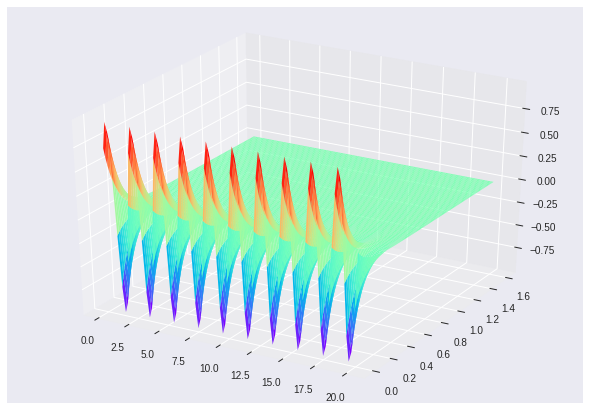

In [139]:
Z=np.zeros((100,100))
for j in range(Z.shape[1]):
  for i in range(Z.shape[0]):
    Z[j,i]=exact_solution(i,j)
    
fig = plt.figure()
ax =Axes3D(fig)
X=np.array([a+i*dx for i in range(100)])
Y=np.array([k*dt for k in range(100)])
X, Y=np.meshgrid(X,Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()

**Implementation2**

**Find  𝐿∞ error between exact solution and ftcs solution**

In [0]:
a=error(100,100,1) #M=100 N=100 rho=1
print("error between exact solution and ftcs solution is"+str(a))

In [140]:
M_=[]
T=[1.88, 1.92, 1.96]
for t in T:
  M_.append(int(t/dt))
print(M_)

[117, 119, 122]
